In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'dataset.csv', 'heart disease c.docx', 'Heart disease prediction.ipynb', 'Heart disease Word File.docx', 'heart disease.txt', 'Report on Heart Disease Prediction.docx', 'Research Paper Heart disease prediction.docx', 'Untitled.ipynb', '~$art disease c.docx', '~$art disease Word File.docx', '~$port on Heart Disease Prediction.docx', '~$search Paper Heart disease prediction.docx']


In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


target
1    165
0    138
Name: count, dtype: int64


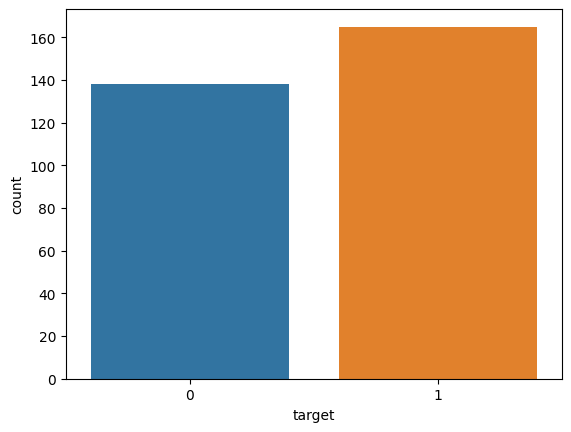

In [13]:
sns.countplot(data=dataset, x="target")

target_temp = dataset["target"].value_counts()
print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [16]:
X_train.shape

(242, 13)

In [17]:
X_test.shape

(61, 13)

In [18]:
Y_train.shape

(242,)

In [19]:
Y_test.shape

(61,)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [22]:
Y_pred_lr.shape

(61,)

In [23]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [25]:
Y_pred_knn.shape

(61,)

In [26]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [27]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [28]:
Y_pred_rf.shape

(61,)

In [29]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [30]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [31]:
Y_pred_nb.shape

(61,)

In [32]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [33]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [34]:
print(Y_pred_dt.shape)

(61,)


In [35]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [36]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


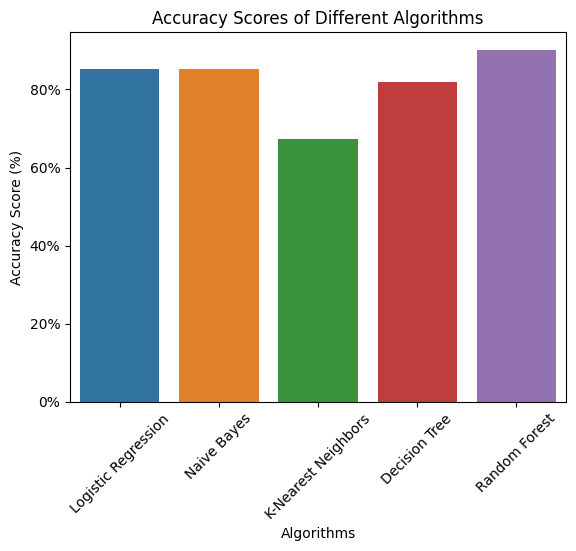

In [37]:
sns.barplot(x=algorithms, y=scores)

plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Accuracy Scores of Different Algorithms")

plt.xticks(rotation=45)

plt.show()


In [38]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Define a list of classifiers
classifiers = [lr, knn, rf, nb, dt]

# Perform model validation using cross-validation
for clf in classifiers:
    scores = cross_val_score(clf, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(f"Cross-validation scores for {clf.__class__.__name__}: {scores}")
    print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores for LogisticRegression: [0.75510204 0.7755102  0.89583333 0.83333333 0.79166667]
Mean accuracy: 0.8102891156462585
Cross-validation scores for KNeighborsClassifier: [0.63265306 0.59183673 0.64583333 0.64583333 0.64583333]
Mean accuracy: 0.6323979591836736
Cross-validation scores for RandomForestClassifier: [0.71428571 0.7755102  0.875      0.85416667 0.875     ]
Mean accuracy: 0.8187925170068027
Cross-validation scores for GaussianNB: [0.73469388 0.7755102  0.85416667 0.91666667 0.77083333]
Mean accuracy: 0.8103741496598639
Cross-validation scores for DecisionTreeClassifier: [0.71428571 0.7755102  0.75       0.75       0.77083333]
Mean accuracy: 0.7521258503401361


In [39]:
def plot_confusion_matrix(conf_matrix, algo_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title("Confusion Matrix - " + algo_name)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

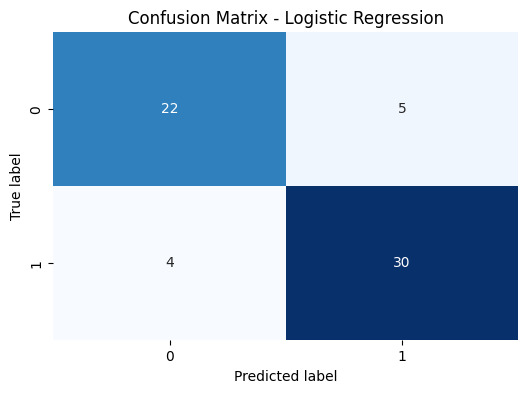

In [40]:
conf_matrix_lr = confusion_matrix(Y_test, Y_pred_lr)
plot_confusion_matrix(conf_matrix_lr, "Logistic Regression")

In [41]:
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
print("Validation for Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

Validation for Logistic Regression:
Precision: 0.8571428571428571
Recall: 0.8823529411764706
F1-score: 0.8695652173913043


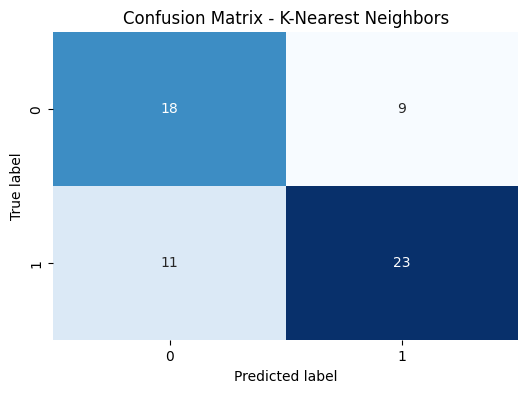

In [42]:
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
plot_confusion_matrix(conf_matrix_knn, "K-Nearest Neighbors")

In [43]:
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
print("\nValidation for K-Nearest Neighbors:")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)


Validation for K-Nearest Neighbors:
Precision: 0.71875
Recall: 0.6764705882352942
F1-score: 0.696969696969697


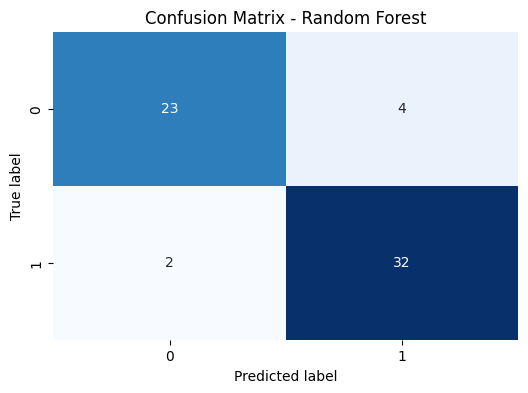

In [44]:
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
plot_confusion_matrix(conf_matrix_rf, "Random Forest")

In [45]:
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
print("\nValidation for Random Forest:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


Validation for Random Forest:
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1-score: 0.9142857142857143


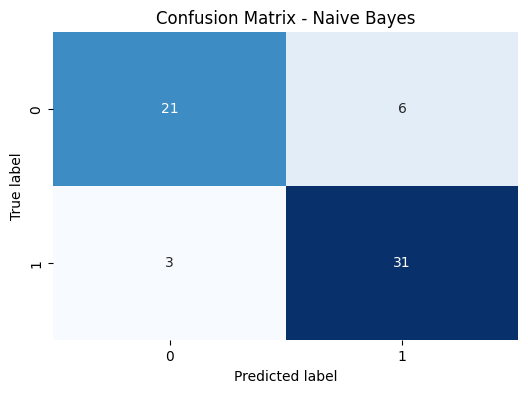

In [46]:
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)
plot_confusion_matrix(conf_matrix_nb, "Naive Bayes")

In [47]:
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)
print("\nValidation for Naive Bayes:")
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)


Validation for Naive Bayes:
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1-score: 0.8732394366197183


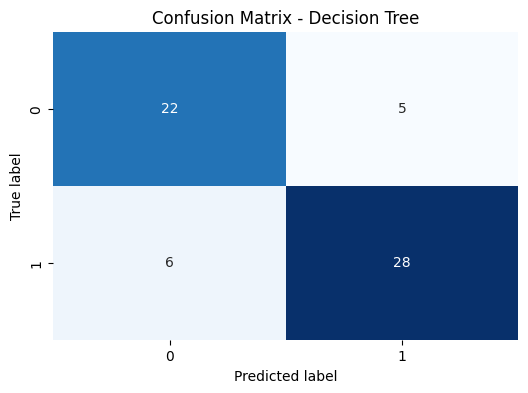

In [48]:
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
plot_confusion_matrix(conf_matrix_dt, "Decision Tree")

In [49]:
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)
print("\nValidation for Decision Tree:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)


Validation for Decision Tree:
Precision: 0.8484848484848485
Recall: 0.8235294117647058
F1-score: 0.835820895522388


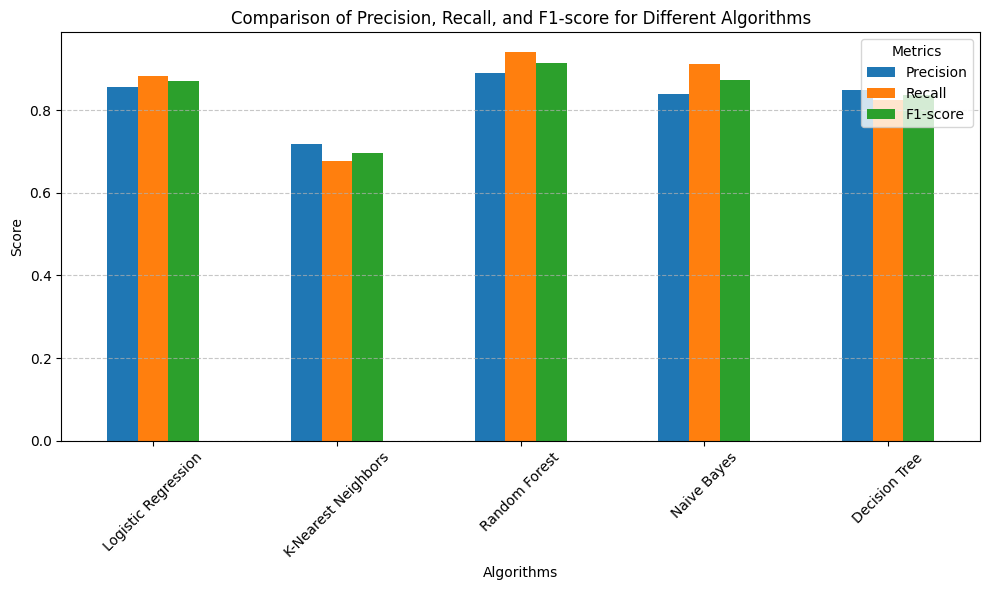

In [50]:
algorithms = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Naive Bayes", "Decision Tree"]
precision = [precision_lr, precision_knn, precision_rf, precision_nb, precision_dt]
recall = [recall_lr, recall_knn, recall_rf, recall_nb, recall_dt]
f1_score = [f1_lr, f1_knn, f1_rf, f1_nb, f1_dt]

comparison_df = pd.DataFrame({
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
}, index=algorithms)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Precision, Recall, and F1-score for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()